In [168]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [169]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

In [170]:
plt.rc('font',family='NanumGothic')
mpl.rcParams['axes.unicode_minus']=False

In [171]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터 읽기

* `welfare_python.csv`

variable | detail | code
:--- | :--- | :--- 
gender | 성별 | 1=남, 2=여
birth | 태어난 연도 | YYYY
marriage | 혼인상태 | 0=비해당(18세미만), 1=배우자있음, 2=사별, 3=이혼, 4=별거, 5=미혼(18세이상, 미혼모포함), 6=기타(사망 등)
religion | 종교 유무 | 1=있음, 2=없음
code_job | 직업 코드 | float64(xxx) (`welfare_job.csv` 참고)
income | 소득(월평균 임금) | float64(xxx)
code_region | 7개 권역별 지역구분 | 1=서울, 2=수도권(인천/경기), 3=부산/경남/울산, 4=대구/경북, 5=대전/충남, 6=강원/충북, 7=광주/전남/전북/제주



In [172]:
#data path
dpath = '/content/drive/MyDrive/Colab Notebooks/통프2/'

In [173]:
df = pd.read_csv(dpath+"welfare_python.csv")
df.head()

,gender,birth,marriage,religion,code_job,income,code_region
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,942.0,120.0,1
3,1,1942,3,1,762.0,200.0,1
4,2,1923,2,1,NaN,NaN,1


In [174]:
# unicode error 뜨는 경우 encoding="CP949" 옵션 추가
ref = pd.read_csv(dpath+"welfare_job.csv",encoding="CP949")
ref.head()

,code_job,job
0,111,의회의원 고위공무원 및 공공단체임원
1,112,기업고위임원
2,120,행정 및 경영지원 관리자
3,131,연구 교육 및 법률 관련 관리자
4,132,보험 및 금융 관리자


## 데이터 전처리

1. gender : 1이면 '남성', 2이면 '여성'으로 변경하여 gender2로 코딩
2. marriage : 1이면 '결혼', 3이면 '이혼', 나머지는 '그외'로 변경하여 marriage2로 코딩
3. code_job : `welfare_job.csv'에서 한글로 된 직업이름정보(job)를 추출하여 병합하여 job으로 코딩
4. code_region : 7개 권역별 지역이름을 문자열로 변경하여 region으로 변경
5. age : 현재 연도에서 태어난 연도를 빼서 신규컬럼 생성
6. religion : 1이면 '종교있음', 2이면 '무교'로 religion2로 표기
7. income : 소득이 없는 결측치의 경우 다른 월급들의 평균으로 대체 income2로 저장
8. agegroup : 연령(age)이 30세 미만이면 '청년', 30세 이상이면서 60세 미만은 '중년', 60세 이상이면 '노년'으로 신규컬럼 코딩 후 범주형 변수로 변경하기

In [175]:
# 1. gender : 1이면 '남성', 2이면 '여성'으로 gender2로 코딩 (loc메소드 적용)
df["gender2"]=["남성" if i==1 else "여성" for i in df.gender]
df

,gender,birth,marriage,religion,code_job,income,code_region,gender2
0,2,1936,2,2,NaN,NaN,1,여성
1,2,1945,2,2,NaN,NaN,1,여성
2,1,1948,2,2,942.0,120.0,1,남성
3,1,1942,3,1,762.0,200.0,1,남성
4,2,1923,2,1,NaN,NaN,1,여성
...,...,...,...,...,...,...,...,...
16659,2,1967,1,1,NaN,NaN,5,여성
16660,2,1992,5,1,314.0,302.5,5,여성
16661,1,1995,5,1,NaN,NaN,5,남성
16662,2,1998,0,1,NaN,NaN,5,여성


In [176]:
# 2. marriage : 1이면 '결혼', 3이면 '이혼', 나머지는 '그외'라는 문자열로 처리하여 marriage2로 저장 (lambda함수 적용해보기)
def recoding(x):
    if x==1:
        return "결혼"
    if x==3:
        return "이혼"
    else:
        return "그외"


df["marriage2"]=df.marriage.apply(lambda x : recoding(x))
df.head()

,gender,birth,marriage,religion,code_job,income,code_region,gender2,marriage2
0,2,1936,2,2,NaN,NaN,1,여성,그외
1,2,1945,2,2,NaN,NaN,1,여성,그외
2,1,1948,2,2,942.0,120.0,1,남성,그외
3,1,1942,3,1,762.0,200.0,1,남성,이혼
4,2,1923,2,1,NaN,NaN,1,여성,그외


In [177]:
# 3. code_job : `welfare_job.csv'에서 한글로 된 직업이름정보(job)를 추출하여 병합 (merge이용)
ref.head()
df=pd.merge(df,ref,on="code_job")
df

,gender,birth,marriage,religion,code_job,income,code_region,gender2,marriage2,job
0,1,1948,2,2,942.0,120.0,1,남성,그외,경비원 및 검표원
1,1,1945,3,2,942.0,220.2,1,남성,이혼,경비원 및 검표원
2,1,1946,1,2,942.0,139.0,1,남성,결혼,경비원 및 검표원
3,1,1953,1,2,942.0,150.0,1,남성,결혼,경비원 및 검표원
4,1,1960,1,1,942.0,166.0,1,남성,결혼,경비원 및 검표원
...,...,...,...,...,...,...,...,...,...,...
7524,2,1950,1,1,819.0,NaN,6,여성,결혼,기타 식품가공관련 기계조작원
7525,1,1960,1,1,111.0,250.0,7,남성,결혼,의회의원 고위공무원 및 공공단체임원
7526,1,1960,1,2,111.0,1250.0,1,남성,결혼,의회의원 고위공무원 및 공공단체임원
7527,1,1992,5,1,876.0,280.0,3,남성,그외,선박 갑판승무원 및 관련 종사원


In [178]:
# 4. code_region : 7개 권역별 지역이름을 문자열로 표기하여 region에 저장 (함수 적용)
# 1=서울, 2=인천/경기, 3=부산/경남/울산, 4=대구/경북, 5=대전/충남, 6=강원/충북, 7=광주/전남/전북/제주
df.code_region.value_counts()
def recoding(x):
    if x == 1:
        return '서울'
    elif x ==2:
        return '인천/경기'
    elif x ==3:
        return '부산/경남/울산'
    elif x ==4:
        return '대구/경북'
    elif x ==5:
        return '대전/충남'
    elif x ==6:
        return '강원/충북'
    else:
        return '광주/전남/전북/제주'

df["region"]=df.code_region.apply(recoding)
df

,gender,birth,marriage,religion,code_job,income,code_region,gender2,marriage2,job,region
0,1,1948,2,2,942.0,120.0,1,남성,그외,경비원 및 검표원,서울
1,1,1945,3,2,942.0,220.2,1,남성,이혼,경비원 및 검표원,서울
2,1,1946,1,2,942.0,139.0,1,남성,결혼,경비원 및 검표원,서울
3,1,1953,1,2,942.0,150.0,1,남성,결혼,경비원 및 검표원,서울
4,1,1960,1,1,942.0,166.0,1,남성,결혼,경비원 및 검표원,서울
...,...,...,...,...,...,...,...,...,...,...,...
7524,2,1950,1,1,819.0,NaN,6,여성,결혼,기타 식품가공관련 기계조작원,강원/충북
7525,1,1960,1,1,111.0,250.0,7,남성,결혼,의회의원 고위공무원 및 공공단체임원,광주/전남/전북/제주
7526,1,1960,1,2,111.0,1250.0,1,남성,결혼,의회의원 고위공무원 및 공공단체임원,서울
7527,1,1992,5,1,876.0,280.0,3,남성,그외,선박 갑판승무원 및 관련 종사원,부산/경남/울산


In [179]:
# 4. code_region : 7개 권역별 지역이름을 문자열로 표기하여 region에 저장 (dictionary 적용)
# 1=서울, 2=인천/경기, 3=부산/경남/울산, 4=대구/경북, 5=대전/충남, 6=강원/충북, 7=광주/전남/전북/제주
dic = { 1: '서울', 2:'인천/경기',3:'부산/경남/울산',4:'대구/경북',5:'대전/충남',6:'강원/충북',7:'광주/전남/전북/제주'}
df["region"]=[dic[i] for i in df.code_region]
df.head()

,gender,birth,marriage,religion,code_job,income,code_region,gender2,marriage2,job,region
0,1,1948,2,2,942.0,120.0,1,남성,그외,경비원 및 검표원,서울
1,1,1945,3,2,942.0,220.2,1,남성,이혼,경비원 및 검표원,서울
2,1,1946,1,2,942.0,139.0,1,남성,결혼,경비원 및 검표원,서울
3,1,1953,1,2,942.0,150.0,1,남성,결혼,경비원 및 검표원,서울
4,1,1960,1,1,942.0,166.0,1,남성,결혼,경비원 및 검표원,서울


In [180]:
# 5. age : 현재 연도에서 태어난 연도를 빼서 신규컬럼 생성
df["age"]=2022-df["birth"]
df.head()

,gender,birth,marriage,religion,code_job,income,code_region,gender2,marriage2,job,region,age
0,1,1948,2,2,942.0,120.0,1,남성,그외,경비원 및 검표원,서울,74
1,1,1945,3,2,942.0,220.2,1,남성,이혼,경비원 및 검표원,서울,77
2,1,1946,1,2,942.0,139.0,1,남성,결혼,경비원 및 검표원,서울,76
3,1,1953,1,2,942.0,150.0,1,남성,결혼,경비원 및 검표원,서울,69
4,1,1960,1,1,942.0,166.0,1,남성,결혼,경비원 및 검표원,서울,62


In [181]:
# 5. age : 현재 연도에서 태어난 연도를 빼서 신규컬럼 생성 (현재 연도를 함수로 가져와보기)
# 구글에서 'year in python' 검색
import datetime
df_now=datetime.datetime.now()
df_now.year

df["age"]=df_now.year - df.birth
df["age"]=datetime.datetime.now().year-df.birth
df.head()

,gender,birth,marriage,religion,code_job,income,code_region,gender2,marriage2,job,region,age
0,1,1948,2,2,942.0,120.0,1,남성,그외,경비원 및 검표원,서울,74
1,1,1945,3,2,942.0,220.2,1,남성,이혼,경비원 및 검표원,서울,77
2,1,1946,1,2,942.0,139.0,1,남성,결혼,경비원 및 검표원,서울,76
3,1,1953,1,2,942.0,150.0,1,남성,결혼,경비원 및 검표원,서울,69
4,1,1960,1,1,942.0,166.0,1,남성,결혼,경비원 및 검표원,서울,62


In [182]:
# 6. religion : 1이면 '종교있음', 2이면 '무교'로 표기하여 religion2로 코딩 (if else 구문 이용)
df["religion2"]= ["유" if i==1 else "무" for i in df.religion]
df.head()

,gender,birth,marriage,religion,code_job,income,code_region,gender2,marriage2,job,region,age,religion2
0,1,1948,2,2,942.0,120.0,1,남성,그외,경비원 및 검표원,서울,74,무
1,1,1945,3,2,942.0,220.2,1,남성,이혼,경비원 및 검표원,서울,77,무
2,1,1946,1,2,942.0,139.0,1,남성,결혼,경비원 및 검표원,서울,76,무
3,1,1953,1,2,942.0,150.0,1,남성,결혼,경비원 및 검표원,서울,69,무
4,1,1960,1,1,942.0,166.0,1,남성,결혼,경비원 및 검표원,서울,62,유


In [183]:
# 7. income : 소득이 없는 결측치의 경우 다른 월급들의 평균으로 대체하여 income2로 코딩
df["income2"]=df.income.fillna(df.income.mean())
df

,gender,birth,marriage,religion,code_job,income,code_region,gender2,marriage2,job,region,age,religion2,income2
0,1,1948,2,2,942.0,120.0,1,남성,그외,경비원 및 검표원,서울,74,무,120.000000
1,1,1945,3,2,942.0,220.2,1,남성,이혼,경비원 및 검표원,서울,77,무,220.200000
2,1,1946,1,2,942.0,139.0,1,남성,결혼,경비원 및 검표원,서울,76,무,139.000000
3,1,1953,1,2,942.0,150.0,1,남성,결혼,경비원 및 검표원,서울,69,무,150.000000
4,1,1960,1,1,942.0,166.0,1,남성,결혼,경비원 및 검표원,서울,62,유,166.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7524,2,1950,1,1,819.0,NaN,6,여성,결혼,기타 식품가공관련 기계조작원,강원/충북,72,유,241.619016
7525,1,1960,1,1,111.0,250.0,7,남성,결혼,의회의원 고위공무원 및 공공단체임원,광주/전남/전북/제주,62,유,250.000000
7526,1,1960,1,2,111.0,1250.0,1,남성,결혼,의회의원 고위공무원 및 공공단체임원,서울,62,무,1250.000000
7527,1,1992,5,1,876.0,280.0,3,남성,그외,선박 갑판승무원 및 관련 종사원,부산/경남/울산,30,유,280.000000


In [184]:
df.head()

,gender,birth,marriage,religion,code_job,income,code_region,gender2,marriage2,job,region,age,religion2,income2
0,1,1948,2,2,942.0,120.0,1,남성,그외,경비원 및 검표원,서울,74,무,120.0
1,1,1945,3,2,942.0,220.2,1,남성,이혼,경비원 및 검표원,서울,77,무,220.2
2,1,1946,1,2,942.0,139.0,1,남성,결혼,경비원 및 검표원,서울,76,무,139.0
3,1,1953,1,2,942.0,150.0,1,남성,결혼,경비원 및 검표원,서울,69,무,150.0
4,1,1960,1,1,942.0,166.0,1,남성,결혼,경비원 및 검표원,서울,62,유,166.0


In [185]:
# 8. agegroup : 연령(age)이 30세 미만이면 '청년', 30세 이상이면서 60세 미만은 '중년', 60세 이상이면 '노년'으로 신규컬럼 코딩 (함수 이용)
def recoding(x):
    if x <30:
        return "청년"
    elif x<60:
        return "중년"
    else:
        return "노년"

df["agegroup"]=df.age.apply(recoding)
df.agegroup.value_counts()

중년    4036
노년    3370
청년     123
Name: agegroup, dtype: int64

In [186]:
# 8. 범주형 변수로 순서 카테고리 지정하기
df.agegroup = pd.Categorical(df.agegroup, categories=["청년","중년","노년"])
df.agegroup

0       노년
1       노년
2       노년
3       노년
4       노년
        ..
7524    노년
7525    노년
7526    노년
7527    중년
7528    노년
Name: agegroup, Length: 7529, dtype: category
Categories (3, object): ['청년', '중년', '노년']

In [187]:
# 9. 다음 변수만 모아서 한글변수명을 붙이고 df2에 저장
# age=연령, agegroup=연령대, birth=생년, gender2=성별, marriage2=결혼상태, religion2=종교유무, 
# region=지역, job=직업, income2=월소득
df2 = df[['age','agegroup','birth','gender2','marriage2','religion2','region','job','income2']]
df2.head()

,age,agegroup,birth,gender2,marriage2,religion2,region,job,income2
0,74,노년,1948,남성,그외,무,서울,경비원 및 검표원,120.0
1,77,노년,1945,남성,이혼,무,서울,경비원 및 검표원,220.2
2,76,노년,1946,남성,결혼,무,서울,경비원 및 검표원,139.0
3,69,노년,1953,남성,결혼,무,서울,경비원 및 검표원,150.0
4,62,노년,1960,남성,결혼,유,서울,경비원 및 검표원,166.0


In [188]:
df2.columns

Index(['age', 'agegroup', 'birth', 'gender2', 'marriage2', 'religion2',
       'region', 'job', 'income2'],
      dtype='object')

In [189]:
# 위치가 변경될 수 있으니 dictionary 이용
dic = {'age':'연령','agegroup':'연령대','birth':'생년','gender2':'성별','marriage2':'결혼상태','religion2':'종교유무','region':'지역','job':'직업','income2':'월소득' }
df2.rename(columns=dic,inplace = True)
df2.head()

,연령,연령대,생년,성별,결혼상태,종교유무,지역,직업,월소득
0,74,노년,1948,남성,그외,무,서울,경비원 및 검표원,120.0
1,77,노년,1945,남성,이혼,무,서울,경비원 및 검표원,220.2
2,76,노년,1946,남성,결혼,무,서울,경비원 및 검표원,139.0
3,69,노년,1953,남성,결혼,무,서울,경비원 및 검표원,150.0
4,62,노년,1960,남성,결혼,유,서울,경비원 및 검표원,166.0


In [190]:
# df2를 /contents/drive/MyDrive/data/output/welfare_clean.csv로 저장
df2.to_csv(dpath+"welfare_clean2.csv")

In [191]:
# welfare_clean.csv를 불러와서 잘 저장되었는지 확인해보기
df=pd.read_csv(dpath+"welfare_clean2.csv")
df.head()

,Unnamed: 0,연령,연령대,생년,성별,결혼상태,종교유무,지역,직업,월소득
0,0,74,노년,1948,남성,그외,무,서울,경비원 및 검표원,120.0
1,1,77,노년,1945,남성,이혼,무,서울,경비원 및 검표원,220.2
2,2,76,노년,1946,남성,결혼,무,서울,경비원 및 검표원,139.0
3,3,69,노년,1953,남성,결혼,무,서울,경비원 및 검표원,150.0
4,4,62,노년,1960,남성,결혼,유,서울,경비원 및 검표원,166.0


In [192]:
import warnings
warnings.filterwarnings(action='ignore')

In [193]:
import matplotlib.font_manager as fm

## 데이터 시각화

### 결혼상태와 종교유무의 분포

In [194]:
# 결혼상태별 빈도 확인
df["결혼상태"].value_counts()

결혼    5307
그외    1803
이혼     419
Name: 결혼상태, dtype: int64

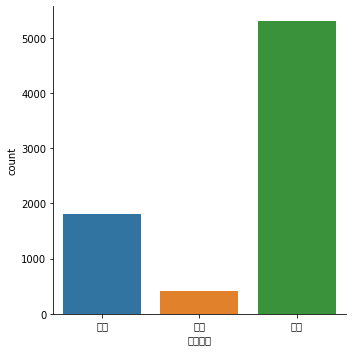

In [195]:
# 빈도막대그래프 그리기
sns.catplot(kind="count",x="결혼상태",data=df);

In [196]:
# 결혼상태 순서를 정해주기
df['결혼상태']=pd.Categorical(df['결혼상태'],categories=['결혼','이혼','그외'])

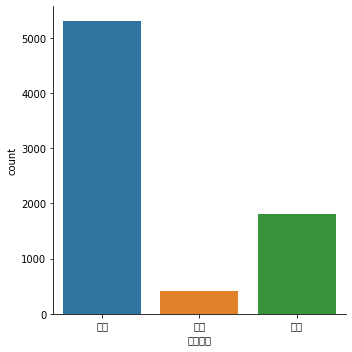

In [197]:
sns.catplot(kind="count",x="결혼상태",data=df)

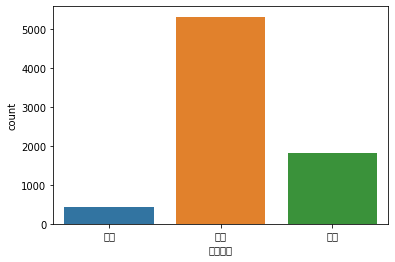

In [198]:
# countplot()의 order 옵션 사용해서 이혼, 결혼, 그외 순으로 그림 그려보기
sns.countplot(x="결혼상태",data=df,order=["이혼","결혼","그외"])

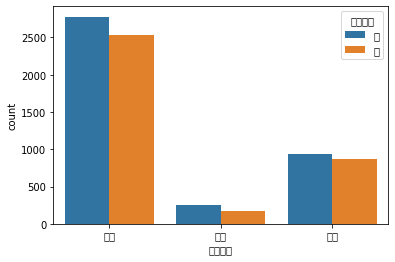

In [199]:
# 결혼상태에 따라 종교유무를 나누어 표기
# 막대 색상을 팔레트 "Set2" 이용
sns.countplot(x="결혼상태",data=df,hue="종교유무")

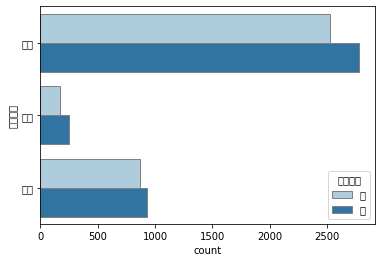

In [200]:
# 위 그림을 가로막대로 그리고, 막대 색상을 팔레트 "Paired"로 주고, 테두리 색상을 gray로 주기
sns.countplot(y="결혼상태",data=df,hue="종교유무",palette="Paired",hue_order=["유","무"],linewidth=1,edgecolor="gray")

### 연령 분포


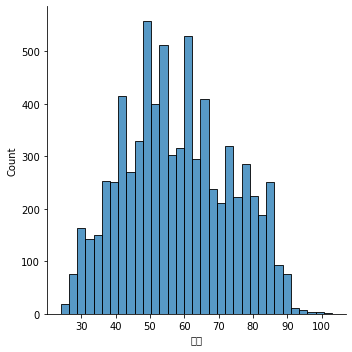

In [201]:
# 연령에 대한 히스토그램
sns.displot(kind="hist",data=df,x="연령")

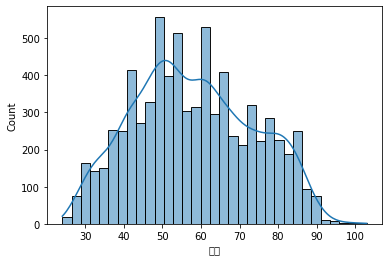

In [202]:
# 연령에 대한 히스토그램에 밀도곡선 얹고, 색상을 magenta로 지정하기
sns.histplot(x="연령",data=df,kde=True)

### 연령과 소득, 결혼유무 분포

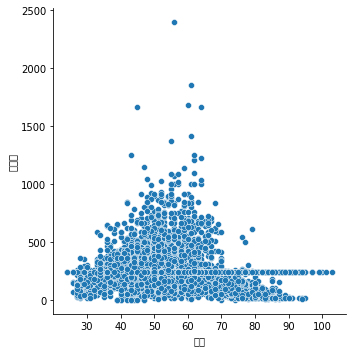

In [203]:
# 연령과 월소득의 산점도
sns.relplot(kind="scatter",x="연령",y="월소득",data=df)

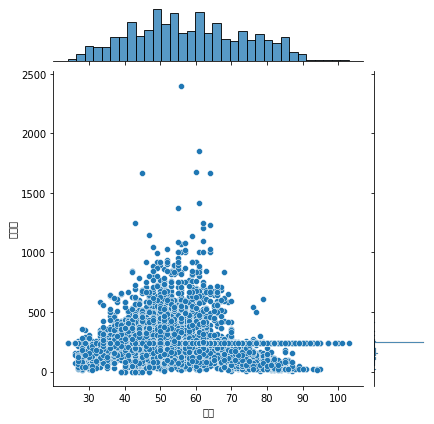

In [204]:
# 연령과 월소득의 산점도 그린 뒤, 마진에 히스토그램 얹기
sns.jointplot(x="연령",y="월소득",data=df)

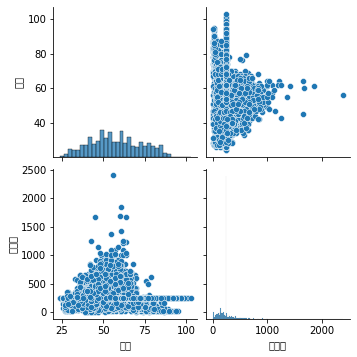

In [205]:
# pairplot으로 그림 그리기
sns.pairplot(data=df[["연령","월소득"]])

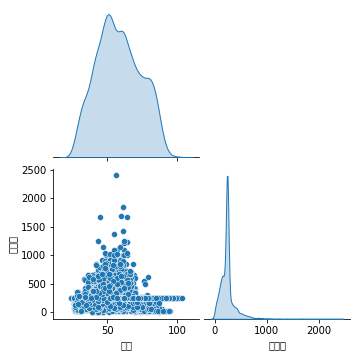

In [206]:
# pairplot의 대각선은 밀도곡선으로 변경하고, 하삼각만 그리기
sns.pairplot(data=df[["연령","월소득"]],diag_kind="kde",corner=True);

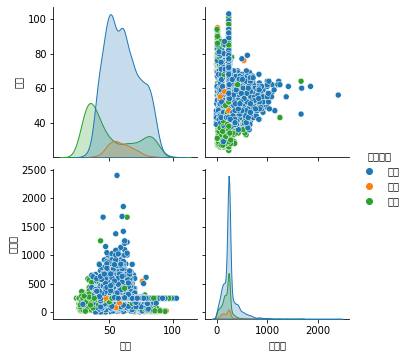

In [207]:
# 연령과 월소득에 대한 pairplot을 결혼상태에 따라 색상을 구분하여 그리기
sns.pairplot(data=df[["연령","월소득","결혼상태"]],hue="결혼상태");

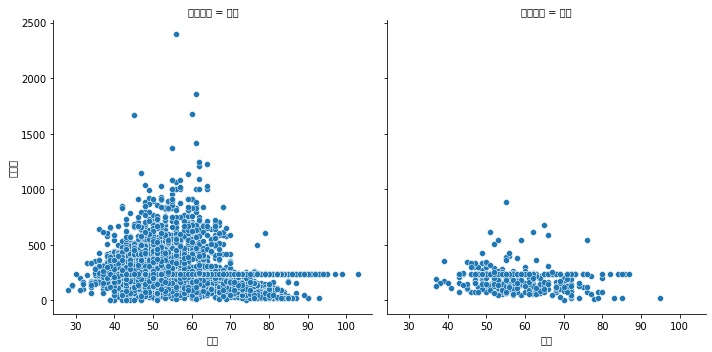

In [208]:
# 연령과 월소득에 대한 산점도를 결혼상태에 따라 나눠서 그리되, 결혼상태는 결혼과 이혼만 추출해서 그리기
sns.relplot(kind="scatter",x="연령",y="월소득",data=df.query("결혼상태=='결혼'|결혼상태=='이혼'"),col="결혼상태",col_order=["결혼","이혼"]);

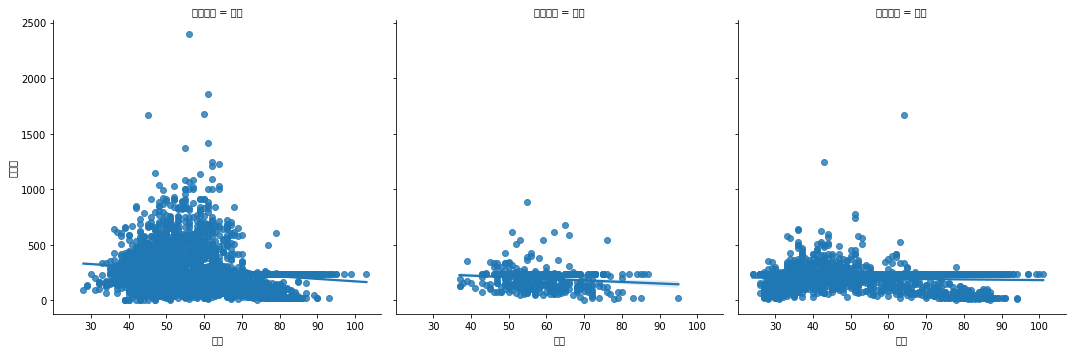

In [209]:
# 연령에 따른 월소득을 회귀도표로 나타내되, 결혼상태에 따라 항목을 나누어서 그리고, 90% 신뢰구간 추가하기
sns.lmplot(x="연령",y="월소득",data=df,col="결혼상태",ci=90);

### 성별과 연령 분포

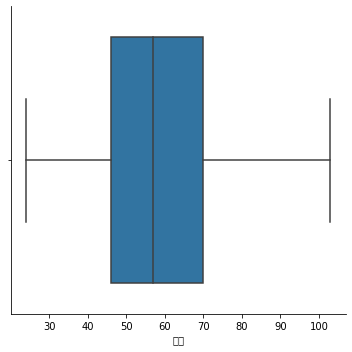

In [210]:
# 연령에 대한 박스그림 
sns.catplot(kind="box",x="연령",data=df);

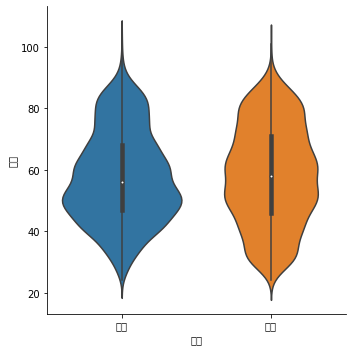

In [211]:
# 성별에 따라 연령에 대한 바이올린 그림 그리기
sns.catplot(kind="violin",y="연령",x="성별",data=df);

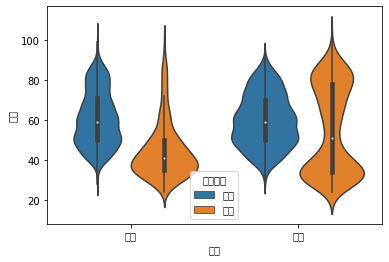

In [212]:
# 성별에 따른 연령분포에 대한 바이올린 그림을 결혼상태에 따라 나눠 그리기 (단, 결혼상태는 '결혼', '그외'만 추출하여 그리기)
sns.violinplot(x="성별",y="연령",data=df.query("결혼상태!='이혼'"),hue="결혼상태",hue_order=["결혼","그외"]);

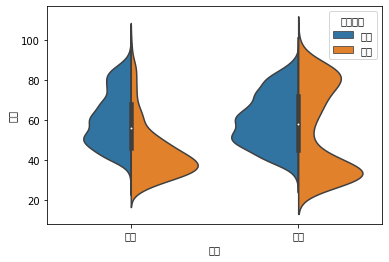

In [213]:
# 성별에 따른 연령분포에 대한 바이올린 그림을 결혼상태에 따라 분할된 바이올린으로 그리기 (단, 결혼상태는 '결혼', '그외'만 추출하여 그리기)
sns.violinplot(x="성별",y="연령",data=df.query("결혼상태!='이혼'"),hue="결혼상태",hue_order=["결혼","그외"],split=True);

### 성별과 소득 분포

In [214]:
# 성별에 따른 평균 월소득 계산
df.groupby("성별")["월소득"].mean()

성별
남성    284.651798
여성    192.135003
Name: 월소득, dtype: float64

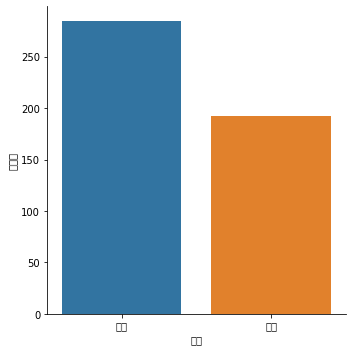

In [215]:
# 성별에 따른 평균 월소득에 대한 평균막대그래프 (신뢰구간 표시 안하기)
sns.catplot(kind="bar",x="성별",y="월소득",data=df,ci=None)

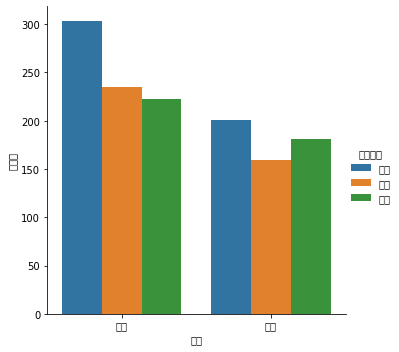

In [216]:
# 성별에 따른 평균 월소득에 대한 평균막대그래프를 결혼상태에 따라 구분하여 가로막대로 그리기
sns.catplot(kind="bar",x="성별",y="월소득",data=df,ci=None,hue="결혼상태")

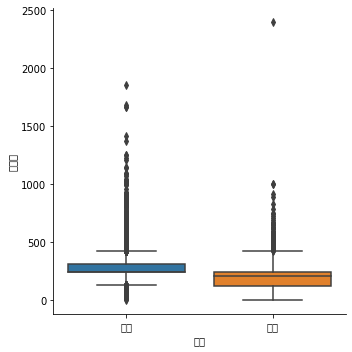

In [217]:
# 성별에 따른 월소득에 대한 박스그림 그리기
sns.catplot(kind="box",x="성별",y="월소득",data=df)

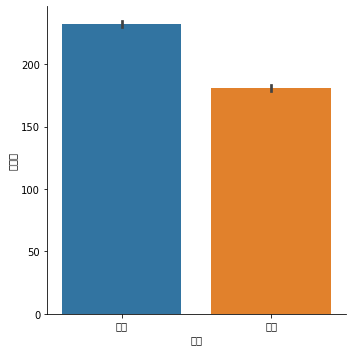

In [218]:
# 성별에 따른 월소득에 대한 박스그림 그리기 (평균 월소득이 400 이하인 개체만 추출)
sns.catplot(kind="bar",x="성별",y="월소득",data=df.query("월소득<=400"))

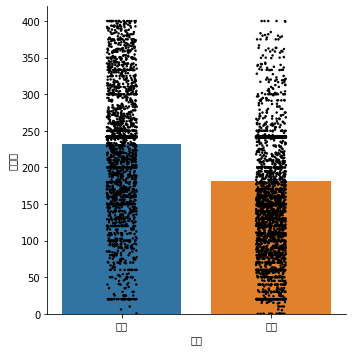

In [219]:
# 위 그림에 jitter형태로 데이터 표현하기 (색상은 검정, 점모양은 .으로 표현)
sns.catplot(kind="bar",x="성별",y="월소득",data=df.query("월소득<=400"))
sns.stripplot(x="성별",y="월소득",data=df.query("월소득<=400"),color="k",marker=".")

# 서울시 구별 CCTV 현황 분석

* [서울시 자치구 연도별 CCTV 설치 현황 데이터](http://data.seoul.go.kr/dataList/OA-2734/F/1/datasetView.do)
* [서울시 자치구 연도별 인구 데이터](https://data.seoul.go.kr/dataList/10790/S/2/datasetView.do)
* 서울시 구별 CCTV 설치현황(구별 인구대비현황 등) 분석
* source: [파이썬으로 데이터 주무르기](https://github.com/PinkWink/DataScience)



## 데이터 읽기

In [220]:
# CCTV 데이터 읽어오기
df = pd.read_csv(dpath+'서울시CCTV설치운영현황(자치구)_년도별_210731기준.csv',encoding='CP949',skiprows=1,thousands=',')
df.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,계,77032,7667,2200,3491,4439,6582,8129,9947,9876,11961,11132,1608
1,종로구,1772,813,0,0,210,150,1,261,85,9,200,43
2,중 구,2333,16,114,87,77,236,240,372,386,155,361,289
3,용산구,2383,34,71,234,125,221,298,351,125,307,617,0
4,성동구,3602,448,125,212,105,339,310,874,390,262,461,76


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   구분        26 non-null     object
 1   총계        26 non-null     int64 
 2   2012년 이전  26 non-null     int64 
 3   2012년     26 non-null     int64 
 4   2013년     26 non-null     int64 
 5   2014년     26 non-null     int64 
 6   2015년     26 non-null     int64 
 7   2016년     26 non-null     int64 
 8   2017년     26 non-null     int64 
 9   2018년     26 non-null     int64 
 10  2019년     26 non-null     int64 
 11  2020년     26 non-null     int64 
 12  2021년     26 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 2.8+ KB


In [222]:
# 구분이 "계"인 행 삭제
df=df.drop(df.index[0])
df.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
1,종로구,1772,813,0,0,210,150,1,261,85,9,200,43
2,중 구,2333,16,114,87,77,236,240,372,386,155,361,289
3,용산구,2383,34,71,234,125,221,298,351,125,307,617,0
4,성동구,3602,448,125,212,105,339,310,874,390,262,461,76
5,광진구,2588,35,57,100,187,98,52,675,465,712,175,32


In [223]:
df.drop('2021년',axis=1,inplace=True)
df.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
1,종로구,1772,813,0,0,210,150,1,261,85,9,200
2,중 구,2333,16,114,87,77,236,240,372,386,155,361
3,용산구,2383,34,71,234,125,221,298,351,125,307,617
4,성동구,3602,448,125,212,105,339,310,874,390,262,461
5,광진구,2588,35,57,100,187,98,52,675,465,712,175


In [224]:
df["총계"]=df.loc[:,"2012년 이전":].sum(axis=1)
df.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
1,종로구,1729,813,0,0,210,150,1,261,85,9,200
2,중 구,2044,16,114,87,77,236,240,372,386,155,361
3,용산구,2383,34,71,234,125,221,298,351,125,307,617
4,성동구,3526,448,125,212,105,339,310,874,390,262,461
5,광진구,2556,35,57,100,187,98,52,675,465,712,175


In [225]:
# 인구 데이터 읽어오기
pop = pd.read_table(dpath+"report.txt",skiprows=2,thousands=",")
pop.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2020,합계,4417954,9911088,4816522,5094566,9668465,4701723,4966742,242623,114799,127824,2.19,1568331
1,2020,종로구,75003,158996,76876,82120,149384,72635,76749,9612,4241,5371,1.99,28507
2,2020,중구,63686,134635,65776,68859,125240,61222,64018,9395,4554,4841,1.97,24495
3,2020,용산구,113093,244645,118835,125810,230040,110722,119318,14605,8113,6492,2.03,40247
4,2020,성동구,135870,300505,146424,154081,293556,143387,150169,6949,3037,3912,2.16,45603


In [226]:
pop = pd.read_table(dpath + 'report.txt',skiprows=2,thousands=',',usecols=['기간','자치구','계','계.1','계.2','65세이상고령자'])
pop.head()

,기간,자치구,계,계.1,계.2,65세이상고령자
0,2020,합계,9911088,9668465,242623,1568331
1,2020,종로구,158996,149384,9612,28507
2,2020,중구,134635,125240,9395,24495
3,2020,용산구,244645,230040,14605,40247
4,2020,성동구,300505,293556,6949,45603


In [227]:
pop.rename(columns={"계":"인구수","계.1":"한국인","계.2":"외국인","65세이상고령자":"고령자"},inplace=True)
pop.head()

,기간,자치구,인구수,한국인,외국인,고령자
0,2020,합계,9911088,9668465,242623,1568331
1,2020,종로구,158996,149384,9612,28507
2,2020,중구,134635,125240,9395,24495
3,2020,용산구,244645,230040,14605,40247
4,2020,성동구,300505,293556,6949,45603


In [228]:
# 자치구가 "합계"인 행 삭제
pop = pop[pop["자치구"] != "합계"]
pop.head()

,기간,자치구,인구수,한국인,외국인,고령자
1,2020,종로구,158996,149384,9612,28507
2,2020,중구,134635,125240,9395,24495
3,2020,용산구,244645,230040,14605,40247
4,2020,성동구,300505,293556,6949,45603
5,2020,광진구,360109,346682,13427,50560


In [229]:
# 자치구별 데이터 개수 확인
pop.groupby("자치구")["기간"].count()
pop.shape

(25, 6)

In [230]:
# 연도 최소 최대 확인
pop["기간"].describe()

count      25.0
mean     2020.0
std         0.0
min      2020.0
25%      2020.0
50%      2020.0
75%      2020.0
max      2020.0
Name: 기간, dtype: float64

## 데이터 파악



### CCTV 현황

In [231]:
# CCTV 데이터에서 CCTV 전체개수로 정렬해서 CCTV가 가장 적은 구부터 5개구 확인하기
df.head()
df.sort_values("총계").head(5)

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
10,도봉구,1298,39,22,96,181,79,159,134,222,198,168
1,종로구,1729,813,0,0,210,150,1,261,85,9,200
2,중 구,2044,16,114,87,77,236,240,372,386,155,361
20,동작구,2286,41,24,25,503,128,253,271,300,322,419
11,노원구,2311,0,97,193,77,516,331,175,216,320,386


In [232]:
# CCTV 데이터에서 CCTV 전체개수로 정렬해서 CCTV가 가장 많은 구부터 5개구 확인하기
df.sort_values("총계",ascending=False).head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
23,강남구,6501,124,77,75,597,840,1310,999,748,789,942
21,관악구,4908,428,205,291,513,529,621,687,663,640,331
17,구로구,4075,852,216,349,187,268,326,540,488,434,415
19,영등포구,3773,572,136,238,123,209,248,311,658,65,1213
8,성북구,3770,83,78,170,230,323,594,460,867,714,251


In [269]:
# 최근 3년간 CCTV 증가율 계산 (최근 3년간 CCTV 수를 더하고, 최근 3년 이전 CCTV 수로 나누기) 
df['3년합계']=df[["2018년","2019년","2020년"]].sum(axis=1)
df["3년이전"]=df.loc[:,"2012년 이전":"2017년"].sum(axis=1)
df['최근3년간CCTV증가율']=df['3년합계']/df['3년이전']*100
df.head()
df.drop(["3년합계","3년이전"],axis=1,inplace=True)
df.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,최근3년간CCTV증가율
1,종로구,1729,813,0,0,210,150,1,261,85,9,200,20.487805
2,중 구,2044,16,114,87,77,236,240,372,386,155,361,78.984238
3,용산구,2383,34,71,234,125,221,298,351,125,307,617,78.635682
4,성동구,3526,448,125,212,105,339,310,874,390,262,461,46.125155
5,광진구,2556,35,57,100,187,98,52,675,465,712,175,112.292359


In [270]:
# 최근 3년 CCTV 증가율이 가장 높았던 구부터 5개구 확인
df.sort_values("최근3년간CCTV증가율",ascending=False).head(5)

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,최근3년간CCTV증가율
9,강북구,2423,0,0,24,65,105,243,6,392,1000,588,446.952596
24,송파구,2753,72,61,86,85,215,148,241,542,1068,235,203.193833
7,중랑구,3292,302,24,253,88,141,161,162,173,1049,939,191.069850
18,금천구,2365,0,0,178,80,361,133,196,540,369,508,149.472574
12,은평구,3660,14,3,44,332,329,555,403,635,1057,288,117.857143


### 서울시 인구현황

In [271]:
# 구별 외국인비율과 고령자비율 계산
pop.head()
pop['외국인비율']=pop['외국인']/pop['인구수']*100
pop['고령자비율']=pop['고령자']/pop['인구수']*100
pop.head()

,기간,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,2020,종로구,158996,149384,9612,28507,6.045435,17.929382
2,2020,중구,134635,125240,9395,24495,6.978126,18.193635
3,2020,용산구,244645,230040,14605,40247,5.969875,16.451184
4,2020,성동구,300505,293556,6949,45603,2.312441,15.175455
5,2020,광진구,360109,346682,13427,50560,3.728593,14.040193


In [276]:
# 2020년 기준 인구수가 가장 많은 구부터 5개구 확인
pop[pop["기간"]==2020].sort_values("인구수",ascending=False).head(5)

,기간,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,2020,송파구,673926,667960,5966,93483,0.885260,13.871404
16,2020,강서구,585901,580185,5716,88984,0.975591,15.187549
23,2020,강남구,544055,539231,4824,75096,0.886675,13.803016
11,2020,노원구,527032,523037,3995,85489,0.758018,16.220837
21,2020,관악구,509803,495060,14743,78875,2.891901,15.471663


In [278]:
# 2020년 기준 외국인 비율이 가장 높은 구부터 5개구 확인
pop[pop["기간"]==2020].sort_values("외국인비율",ascending=False).head(5)

,기간,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
2,2020,중구,134635,125240,9395,24495,6.978126,18.193635
19,2020,영등포구,407367,379480,27887,61688,6.845670,15.143102
18,2020,금천구,247835,231733,16102,39842,6.497065,16.076018
17,2020,구로구,432488,404408,28080,70198,6.492666,16.231202
1,2020,종로구,158996,149384,9612,28507,6.045435,17.929382


In [280]:
# 2020년 기준 고령자 비율이 가장 높은 구부터 5개구 확인
pop[pop["기간"]==2020].sort_values("고령자비율",ascending=False).head(5)

,기간,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,2020,강북구,311569,308055,3514,63422,1.127840,20.355684
10,2020,도봉구,327361,325257,2104,62059,0.642716,18.957359
2,2020,중구,134635,125240,9395,24495,6.978126,18.193635
1,2020,종로구,158996,149384,9612,28507,6.045435,17.929382
12,2020,은평구,484043,479835,4208,85187,0.869344,17.599056


## 데이터 병합

In [282]:
# CCTV 데이터에서 불필요한 부분 삭제
df.drop(df.loc[:,"2012년 이전":"2020년"].columns,axis=1,inplace=True)
df.head()

,구분,총계,최근3년간CCTV증가율
1,종로구,1729,20.487805
2,중 구,2044,78.984238
3,용산구,2383,78.635682
4,성동구,3526,46.125155
5,광진구,2556,112.292359


In [286]:
# 서울시 데이터에서 불필요한 부분 삭제 (2020년 기준 자치구, 인구수, 한국인, 외국인, 고령자, 외국인비율, 고령자비율만 남기기)
pop.head()

,기간,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,2020,종로구,158996,149384,9612,28507,6.045435,17.929382
2,2020,중구,134635,125240,9395,24495,6.978126,18.193635
3,2020,용산구,244645,230040,14605,40247,5.969875,16.451184
4,2020,성동구,300505,293556,6949,45603,2.312441,15.175455
5,2020,광진구,360109,346682,13427,50560,3.728593,14.040193


In [294]:
# 두 데이터 병합 (구 이름 기준)
final=pd.merge(df,pop,left_on="구분",right_on="자치구")
final.head()

,구분,총계,최근3년간CCTV증가율,기간,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1729,20.487805,2020,종로구,158996,149384,9612,28507,6.045435,17.929382
1,용산구,2383,78.635682,2020,용산구,244645,230040,14605,40247,5.969875,16.451184
2,성동구,3526,46.125155,2020,성동구,300505,293556,6949,45603,2.312441,15.175455
3,광진구,2556,112.292359,2020,광진구,360109,346682,13427,50560,3.728593,14.040193
4,동대문구,2434,34.847645,2020,동대문구,357014,342837,14177,61796,3.970993,17.309125


In [295]:
# 구 이름을 index로 부여하기
final.drop("자치구",axis=1,inplace=True)
final
final.set_index("구분",inplace=True)
final

,총계,최근3년간CCTV증가율,기간,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구분,,,,,,,,,
종로구,1729,20.487805,2020,158996,149384,9612,28507,6.045435,17.929382
용산구,2383,78.635682,2020,244645,230040,14605,40247,5.969875,16.451184
성동구,3526,46.125155,2020,300505,293556,6949,45603,2.312441,15.175455
광진구,2556,112.292359,2020,360109,346682,13427,50560,3.728593,14.040193
동대문구,2434,34.847645,2020,357014,342837,14177,61796,3.970993,17.309125
중랑구,3292,191.069850,2020,399562,394702,4860,69447,1.216332,17.380782
성북구,3770,94.530444,2020,447056,437153,9903,73770,2.215159,16.501288
강북구,2423,446.952596,2020,311569,308055,3514,63422,1.127840,20.355684
도봉구,1298,82.816901,2020,327361,325257,2104,62059,0.642716,18.957359


## 데이터 분석

### 상관분석


In [296]:
# CCTV수와 인구수, 고령자비율, 외국인비율 간의 상관관계
# ?pd.DataFrame.corr
final[['총계','인구수','고령자비율','외국인비율']].corr()

,총계,인구수,고령자비율,외국인비율
총계,1.000000,0.428836,-0.418477,-0.083968
인구수,0.428836,1.000000,-0.488470,-0.572167
고령자비율,-0.418477,-0.488470,1.000000,0.061001
외국인비율,-0.083968,-0.572167,0.061001,1.000000


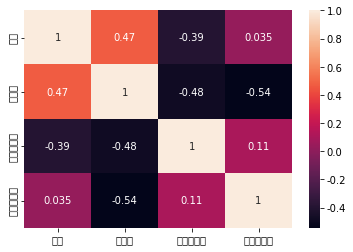

In [297]:
# heatmap으로 나타내기
sns.heatmap(final[['총계','인구수','고령자비율','외국인비율']].corr(method="spearman"),annot=True)

### 구별 CCTV 현황 그래프

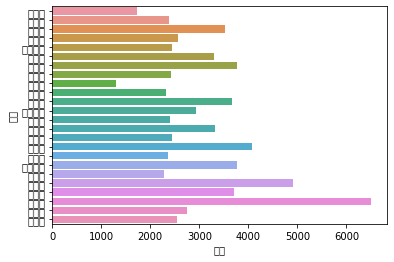

In [300]:
# 구별 CCTV 총계를 가로막대그래프로 그려보기
sns.barplot(x="총계",y=final.index,data=final);

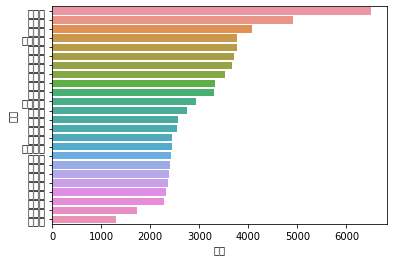

In [304]:
# 총계가 가장 높은 구부터 차례로 도표
final.sort_values("총계",ascending=False, inplace=True)
sns.barplot(x="총계",y=final.index,data=final);

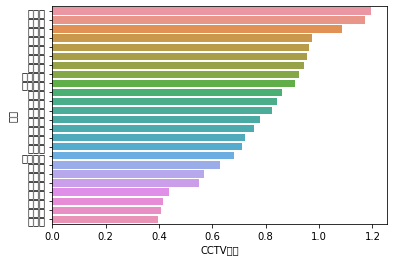

In [305]:
# 인구수 대비 CCTV 개수의 비율을 구하고 가장 높은 구부터 도표
final['CCTV비율']=final['총계']/final['인구수']*100
final.sort_values('CCTV비율',ascending=False,inplace=True)
final.head()
sns.barplot(x='CCTV비율',y=final.index,data=final);

### 인구수와 CCTV 관계

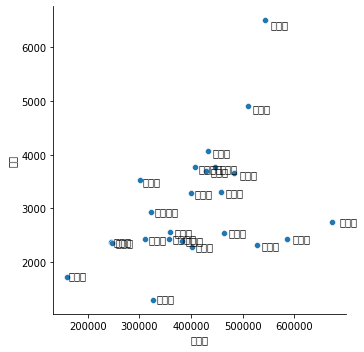

In [307]:
# 인구수 대비 CCTV 수에 대한 산점도 그리기
sns.relplot(kind="scatter",x="인구수",y="총계",data=final)
for i in range(final.shape[0]):
    plt.text(x=final['인구수'][i]*1.02,y=final['총계'][i]*0.98,s=final.index[i]) #위치조정해주기

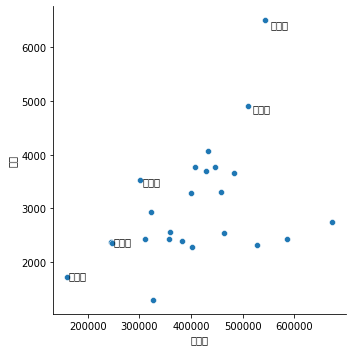

In [309]:
# 인구수 대비 CCTV 수에 대한 산점도 그리기 (CCTV가 가장 많은 구부터 5개구만 표기하기)
sns.relplot(kind="scatter",x="인구수",y="총계",data=final)
for i in range(5):
    plt.text(x=final["인구수"][i]*1.02,y=final["총계"][i]*0.98,s=final.index[i])

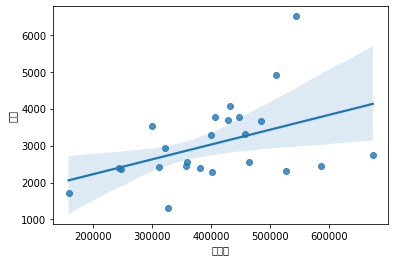

In [316]:
# 인구수 대비 CCTV 개수에 대한 회귀도표 그리고 90% 신뢰구간 표기하기
sns.regplot(x="인구수",y="총계",data=final,ci=90);

# THE END